Import Necessary Modules

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

In [108]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")
print("View of the dataframe ")
df.head()

View of the dataframe 


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Descriptive Analysis

In [137]:
# headline length to view the string length
df['headline_length']=df['headline'].str.len()

max_hl = df['headline_length']=df['headline'].str.len().max()
print("Maximum headline length is " ,max_hl)

Maximum headline length is  512


In [110]:
# publisher statistics of the top 10 publishers
pub_count= df['publisher'].value_counts().head(10)
print(pub_count)

# top publisher
most_active_publisher = pub_count.idxmax()
print(f"\nThe most active publisher is: {most_active_publisher}")

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

The most active publisher is: Paul Quintaro


In [111]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['day_of_week'] = df['date'].dt.day_name()
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_counts = df['day_of_week'].value_counts().reindex(ordered_days)
print("Publication frequency by day of week:\n", daily_counts)

Publication frequency by day of week:
 day_of_week
Monday       10322
Tuesday      11002
Wednesday    11891
Thursday     12688
Friday        9381
Saturday       267
Sunday         436
Name: count, dtype: int64


In [114]:
yearly_counts = df.resample('YE', on='date').size()
yearly_counts.index = yearly_counts.index.strftime('%Y')
print("Yearly Publication frequency:\n", yearly_counts)

Yearly Publication frequency:
 date
2011      760
2012     1187
2013     1240
2014     1189
2015     3695
2016     4223
2017     3581
2018     5395
2019     6325
2020    28392
dtype: int64


Text Analysis(Topic Modeling)

Import Packages and Modules related to NLP

In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

# Download necessary NLTK data (run once)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mihret.mekbebe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mihret.mekbebe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mihret.mekbebe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Extracting publishings based on significant events

In [115]:
# identifying the phrases of interest
event_keywords= ["fda approval", "price target"]
def extract_event_phrases(text):
    text_lower = text.lower() # lowering the text so that it won't miss entries due to capitalization
    found = [phrase for phrase in event_keywords if phrase in text_lower]
    return found

df['match']=df['headline'].apply(extract_event_phrases) # applying the function to the headline column
filtered_df = df[df['match'].str.len()>0] # filtering only those that include the event_keywords when those phrases are not matched it shows [] i.e len=0
filtered_df.head(5) # viewing the filtered data

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,match
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,[price target]
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,71,Friday,[price target]
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,73,Friday,[price target]
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,84,Friday,[price target]
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,42,Friday,[price target]


Time Series Analysis

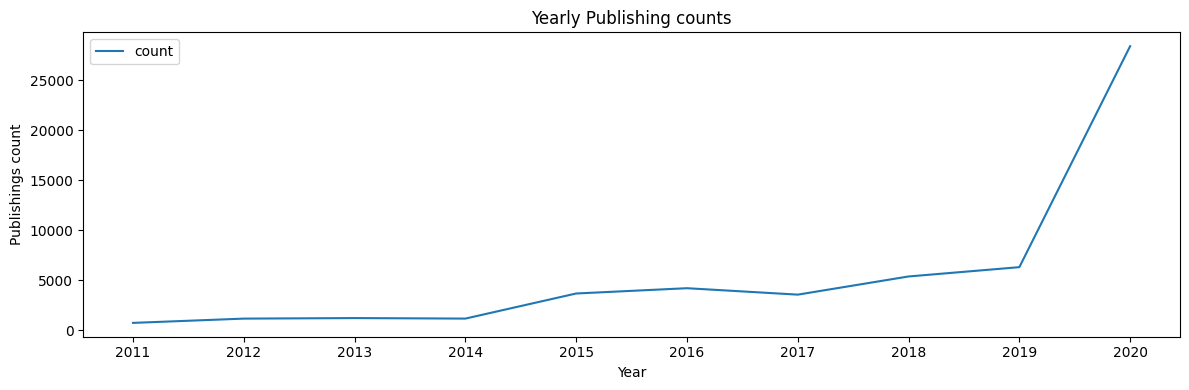

In [141]:
# using the daily count to view the trend over the days
def plot_series(series, title="Publishings over the Year"):
   plt.figure(figsize=(12,4))
   plt.plot(series.index, series.values, label='count')
   plt.title(title)
   plt.xlabel('Year')
   plt.ylabel('Publishings count')
   plt.legend()
   plt.tight_layout()
   plt.show()

plot_series(yearly_counts, title="Yearly Publishing counts")


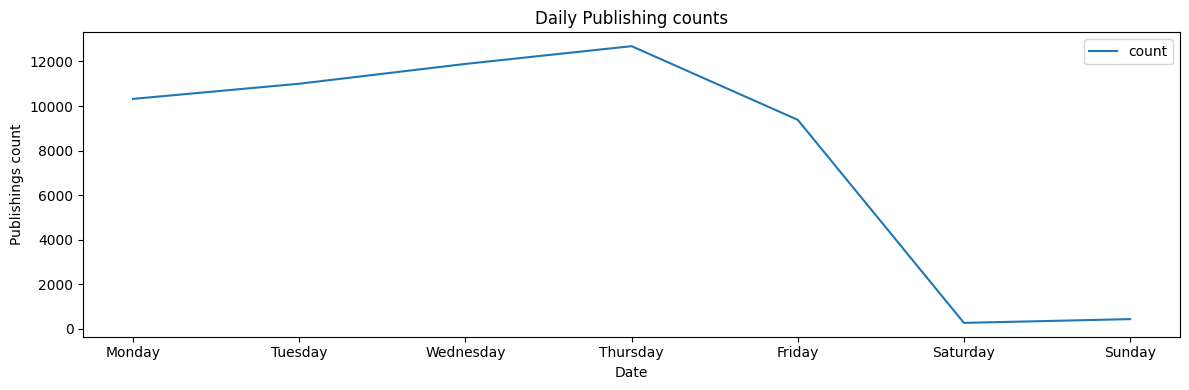

In [140]:
# using the daily count to view the trend over the days of the week
def plot_series(series, title="Publishings over time"):
   plt.figure(figsize=(12,4))
   plt.plot(series.index, series.values, label='count')
   plt.title(title)
   plt.xlabel('Date')
   plt.ylabel('Publishings count')
   plt.legend()
   plt.tight_layout()
   plt.show()

plot_series(daily_counts, title="Daily Publishing counts")


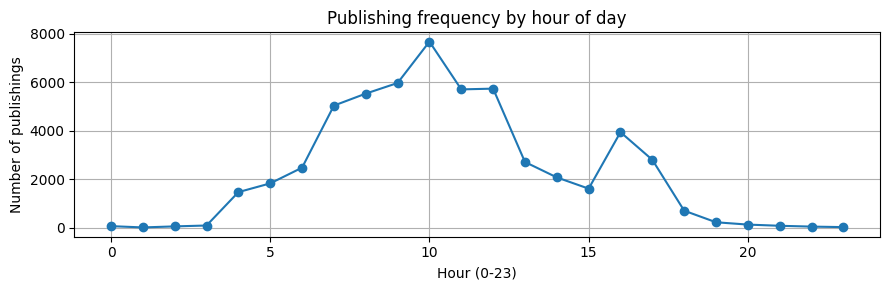

In [118]:
# viewing the frequency based on the time of the day to see the spikes over the day
if 'date' in df.columns:
   df['hour'] = df['date'].dt.hour
   hourly_counts = df.groupby('hour').size()
   plt.figure(figsize=(9,3))
   plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
   plt.title('Publishing frequency by hour of day')
   plt.xlabel('Hour (0-23)')
   plt.ylabel('Number of publishings')
   plt.grid(True)
   plt.tight_layout()
   plt.show()

Publisher Analysis

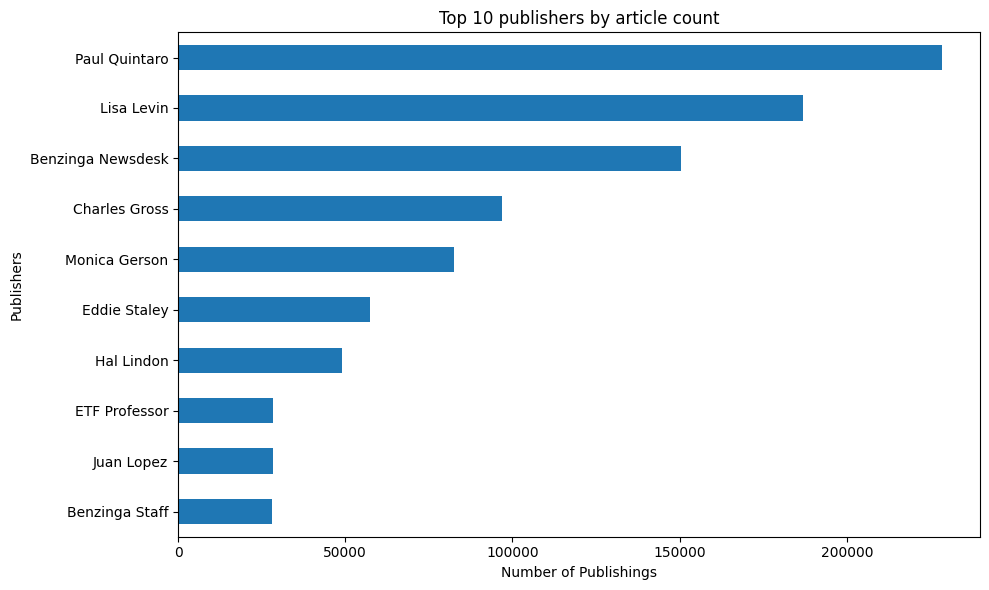

In [142]:
pub_count_clean= df['publisher'].value_counts().head(10)

plt.figure(figsize=(10,6))
pub_count_clean.sort_values().plot(kind='barh')
plt.title(f"Top {len(pub_count_clean)} publishers by article count")
plt.xlabel('Number of Publishings')
plt.ylabel('Publishers')
plt.tight_layout()
plt.show()

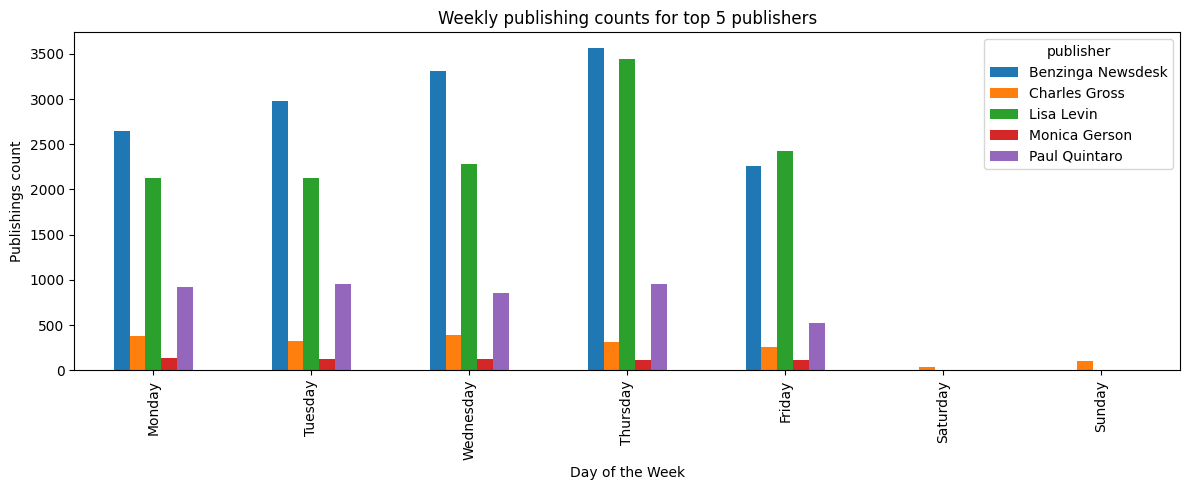

In [135]:
top5 = pub_count_clean.head(5).index.tolist()
df_top5 = df[df['publisher'].isin(top5)]
pivot = df_top5.assign(weekday=pd.to_datetime(df_top5['date']).dt.day_name()).groupby(['weekday','publisher']).size().unstack(fill_value=0)
pivot = pivot.reindex(ordered_days)
pivot.plot(kind='bar', figsize=(12,5))
plt.title("Weekly publishing counts for top 5 publishers")
plt.xlabel('Day of the Week')
plt.ylabel('Publishings count')
plt.tight_layout()
plt.show()

In [ ]:
event_patterns = ["fda approval", "price target"]
def contains_event(text):
   if not isinstance(text, str): return False
   t = text.lower()
   return any(p in t for p in event_patterns)
df['has_event'] = df['headline'].apply(contains_event)
events_by_publisher = df[df['has_event']].groupby('publisher').size().sort_values(ascending=False).head(30)
print("Top publishers by event-related Publishings:\n", events_by_publisher.head(10))

Top publishers by event-related articles:
 publisher
Vick Meyer                 21615
Benzinga_Newsdesk           7167
Lisa Levin                  4764
Paul Quintaro               3899
Benzinga Newsdesk           3635
vishwanath@benzinga.com     1827
Eddie Staley                1673
Shanthi Rexaline            1096
Hal Lindon                   829
Charles Gross                733
dtype: int64


Seeing domain-specific publications

In [126]:
df['publisher_clean'] = df['publisher'].astype(str).str.lower().str.strip() #normalize

def domain_from_string(s):
       if pd.isna(s): return None
       # try extract domain from url or email
       m = re.search(r'@([\w\.-]+)', s)
       if m:
           return m.group(1).lower()
       m = re.search(r'https?://([^/]+)', s)
       if m:
           return m.group(1).lower()
       # fallback: return the string itself
       return s.split()[0].lower()

df['publisher_domain'] = df['publisher_clean'].apply(domain_from_string)

df_domain = df[df['publisher_domain'].notna() & df['publisher_clean'].str.contains('@', na=False)]


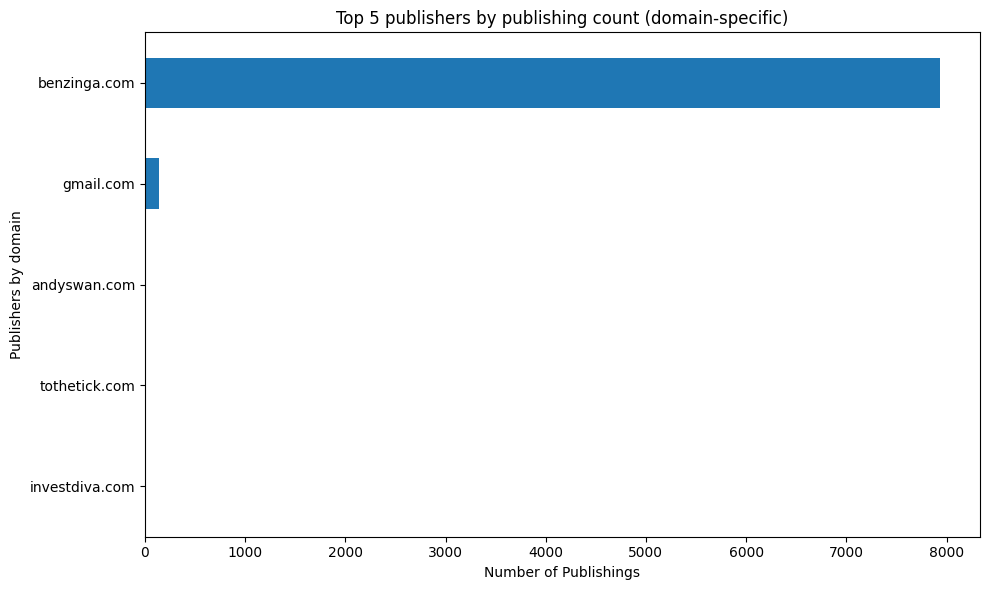

In [143]:
pub_count_clean_domain= df_domain['publisher_domain'].value_counts().head(5)

plt.figure(figsize=(10,6))
pub_count_clean_domain.sort_values().plot(kind='barh')
plt.title(f"Top {len(pub_count_clean_domain)} publishers by publishing count (domain-specific)")
plt.xlabel('Number of Publishings')
plt.ylabel('Publishers by domain')
plt.tight_layout()
plt.show()